## Лабораторная работа № 6
# Поиск безусловного экстремума функции
---
## Задание:
>Найти точку минимума функции $f(x_1,x_2)=x_1^2+x_2^3-15x_1x_2$, $[x_1^0=280, x_2^0=37]$ методом Ньютона-Рафсона. В окрестности точки минимума оценить овражность, построить линии уровня и траекторию поиска. Исследовать условия сходимости.
>Обеспечить работу программы с исходной функцией в режиме «черного ящика».
>Обеспечить работу программы с функциями с размерностью на единицу выше заданной.
>Обеспечить работу программы с функциями любой размерности (до  10 включительно).


### Градиентный метод с дроблением шага. 
Большинство процессов, используемых для приближенного решения задачи можно представить как итерационные в виде $x_{k+1} = x_k + α_kp_k$. Здесь $x_k$ начальное приближение, $x_{k+1}$ следующее, $p_k$-направление поиска, которое совпадает с направление антиградиента. Параметрами метода являются величины $α > 0$ и $λ ∈ (0, 1)$. Параметр $λ$ называется коэффициентом дробления. Значения параметров выбираются наперед; они одни и те же для всех итераций.
Выбор $α_k$ происходит следующим образом. Положив сначала $α_0 = α$, проверим неравенство $f(x_k + α_0p_k) < f(x_k) \quad *$.
Если оно выполнено, то берем $α_k = α_0$. В противном случае значение $α_0$ изменяем, домножив его на $λ$ (дробление $α_0$). Снова проверяем $(*)$. И так до тех пор, пока неравенство $(*)$ не выполнится. То значение $α_0$, при котором это произойдет впервые, и выбираем в качестве $α_k$.

## Исследование условий сходимости
---
>1.) Для сходимости итерационного процесса необходима непрерывность функции в окрестности точки экстремума. Как видно, функция этому условию удовлетворяет.

>2.) Сходимость метода заведомо гарантируется только при положительной определенности гессиана функции. Из критерия Сильвестра- "для того, чтобы квадратичная форма, пораждаемая данной матрицей была положительно определенной, необходимо и достаточно, чтобы все окаймляющие миноры этой матрицы были положительными". Этот критерий проверяется во время работы программы, и в случае его невыполнения, программа возвращает сообщение об ошибке.

## Оценка овражности
Найдя координаты минимума $x$ исследуемой функции, представляется возможным оценить её показатель овражности в окрестности этого минимума. По определению, под показателем овражности $θ$ функции $f(x)$ в окрестности точки минимума $x$ подразумевают отношение наибольшего собственного числа матрицы Гессе $∇^2f(x)$ к наименьшему. Чем больше этот показатель, тем более вытянутым и крутым является "овраг" поверхности уровня $f(x)$ в окрестности $x$ и тем медленнее сходятся в этой окрестности градиентные итерационные методы. 

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm, inv, eig, det
#исходная функция
def f1(x):
    return x[0]**2+x[1]**3-15*x[0]*x[1]
def f2(x):
    return np.exp(x[0]/2)*(x[0]+x[1]**2) 
def f3(x):
    return -(4-2*(x[0]-3)**2-(x[1]-2)**2-3*(x[2]+1)**4)
def f4(x):
    return x[0]**2+x[1]**2+x[2]**2+x[3]**2+x[4]**2+x[5]**2+x[6]**2+x[7]**2+x[8]**2+x[9]**2
#вычисление градиента в точке
def grad(f, xx):
    h=0.0001
    dim=len(xx)
    g=np.array([0.]*dim)
    for i in range(dim):
        hi=np.array([0.]*dim)
        hi[i]=0.0001
        g[i]=((f(xx+hi)-f(xx-hi))/2/h)
    return g

#вычисление гессиана в точке для проверки сходимости метода
def gess(f, xx):
    dim=len(xx)
    h=0.0001
    df=np.zeros((dim, dim))
    e=np.eye(dim)
    for j in range(0, dim):
        for k in range(0, dim):
            a=xx+(e[j]+e[k])*h
            b=xx+e[j]*h
            c=xx+e[k]*h
            l=f(a)-f(b)-f(c)+f(xx)
            df[j][k]=l/h**2
    return df
#функця для поиска
def func(f, x, e):
    kj=10000
    xk=[]
    i=1
    while kj>e:
        xk.append(x)
        u=2
        v=1
        p=-grad(f, x)
        a=1
        while u>v:
            u=f(x+a*p)
            v=f(x)
            a*=1/2
        x1=x+a*p
        kj=norm((x1-x), 1)/(norm(x1,1))
        x=x1
        i+=1
    xk.append(x1)
    return xk,i
#основная функция, включающая поиск минимума и проверку сходимости метода
def m1(f, ni):
    x0=[]
    eps=float(input('epsilon= '))
    print('начальная точка:')
    for j in range(ni):
        print('x0[', j+1, ']')
        x0.append(float(input()))
    hl=gess(f, x0)
    p=0
    for m in range(1,ni+1):
        hk=np.zeros((m, m))
        for n in range(m):
            for k in range(m):
                hk[n][k]=hl[n][k]
        if det(hk)>0:
            p+=1
    if p!=ni:
        print('Error!')
        return 0,0
    else:
        xm, q = func(f, x0, eps)
        xs=np.zeros((q, len(x0)))
        for l in range(q):
            for t in range(len(x0)):
                xs[l][t]=xm[l][t]
            print(repr(l).center(5), '|', xs[l])
    return q, xs 



In [5]:
#####вызов функции( поиск минимума)
qp, xt = m1(f1, 2)




epsilon= 0.000000000001
начальная точка:
x0[ 1 ]
280
x0[ 2 ]
37
  0   | [ 280.   37.]
  1   | [ 279.98046875   37.36328125]
  2   | [ 279.9823761    37.40883857]
  3   | [ 279.99149974   37.42033882]
  4   | [ 280.00182851   37.41273901]
  5   | [ 280.01110529   37.41967891]
  6   | [ 280.0309955    37.41138938]
  7   | [ 280.03532694   37.41775175]
  8   | [ 280.18477973   37.45093505]
  9   | [ 280.19022686   37.43161508]
  10  | [ 280.20731706   37.42342728]
  11  | [ 280.21097633   37.42956411]
  12  | [ 280.33866493   37.46054379]
  13  | [ 280.34347285   37.44180532]
  14  | [ 280.35081765   37.43778763]
  15  | [ 280.36433607   37.44557569]
  16  | [ 280.3680664    37.44148047]
  17  | [ 280.47882568   37.43243242]
  18  | [ 280.48089144   37.44657849]
  19  | [ 280.49240542   37.45399489]
  20  | [ 280.49562851   37.45001396]
  21  | [ 280.59049756   37.44048784]
  22  | [ 280.59216288   37.45410922]
  23  | [ 280.60196464   37.46116469]
  24  | [ 280.60475191   37.45730879]
  

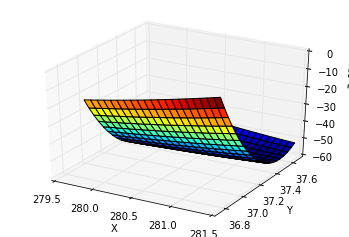

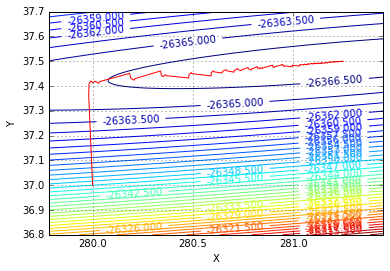

In [6]:
#построение поверхности, линий уровняи траектории поиска
xt=np.array(xt)
x=xt[:, 0]
y=xt[:, 1]
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.linspace(min(x)-0.2, max(x)+0.2, 200)
Y = np.linspace(min(y)-0.2, max(y)+0.2, 200)
X, Y = np.meshgrid(X, Y)
R=[X, Y]
Z = f1(R)
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
pl.xlabel('X')
pl.ylabel('Y')
plt.show()

pl.plot(x, y, 'r-')
cs = pl.contour(X, Y, Z, 40, cmap=cm.jet)
pl.clabel(cs)
pl.xlabel('X')
pl.ylabel('Y')
pl.grid(True)
pl.show()




In [7]:
#овражность
d=eig(gess(f2, xt[qp-1]))
d1=max(d[0])
d2=abs(min(d[0]))
print('Овражность = ', d1/d2)


Овражность =  324.078404712
